### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "xing_scan_end_of_levelling"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  qx     qy     crossing_angle                      
lhcb1 62.305 60.310 150.0               base_collider   
                    160.0               base_collider   
                    170.0               base_collider   
                    180.0               base_collider   
                    190.0               base_collider   
...                                               ...   
      62.329 60.334 310.0               base_collider   
                    320.0               base_collider   
                    330.0               base_collider   
                    340.0               base_collider   
                    350.0               base_collider   

                                    normalized amplitude in xy-plane      qx  \
beam  qx     qy     crossing_angle                                             
lhcb1 62.305 60.310 150.0                                      4.000  62.305   
                    160.0                                      4.000  62.305   
                    170.0                                      4.000  62.305   
                    180.0                                      4.000  62.305   
                    190.0                                      4.062  62.305   
...                                                              ...     ...   
      62.329 60.334 310.0                                      4.000  62.329   
                    320.0                                      4.000  62.329   
                    330.0                                      4.000  62.329   
                    340.0                                      4.000  62.329   
                    350.0                                      4.000  62.329   

                                        qy   dqx   dqy  i_bunch_b1  \
beam  qx     qy     crossing_angle                                   
lhcb1 62.305 60.310 150.0           60.310  15.0  15.0       150.0   
                    160.0           60.310  15.0  15.0       150.0   
                    170.0           60.310  15.0  15.0       150.0   
                    180.0           60.310  15.0  15.0       150.0   
                    190.0           60.310  15.0  15.0       150.0   
...                                    ...   ...   ...         ...   
      62.329 60.334 310.0           60.334  15.0  15.0       150.0   
                    320.0           60.334  15.0  15.0       150.0   
                    330.0           60.334  15.0  15.0       150.0   
                    340.0           60.334  15.0  15.0       150.0   
                    350.0           60.334  15.0  15.0       150.0   

                                    i_bunch_b2  i_oct_b1  i_oct_b2  \
beam  qx     qy     crossing_angle                                   
lhcb1 62.305 60.310 150.0                147.0     -60.0     -60.0   
                    160.0                147.0     -60.0     -60.0   
                    170.0                147.0     -60.0     -60.0   
                    180.0                147.0     -60.0     -60.0   
                    190.0                147.0     -60.0     -60.0   
...                                        ...       ...       ...   
      62.329 60.334 310.0                147.0     -60.0     -60.0   
                    320.0                147.0     -60.0     -60.0   
                    330.0                147.0     -60.0     -60.0   
                    340.0                147.0     -60.0     -60.0   
                    350.0                147.0     -60.0     -60.0   

                                    num_particles_per_bunch  crossing_angle  
beam  qx     qy     crossing_angle                                           
lhcb1 62.305 60.310 150.0                      2.200000e+11           150.0  
                    160.0                      2.200000e+11           160.0  
                    170.0                      2.200000e+11           170.0  
                    180.0               

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,...,260.0,270.0,280.0,290.0,300.0,310.0,320.0,330.0,340.0,350.0
qx,,,,,,,,,,,,,,,,,,,,,
62.305,4.0,4.0,4.000,4.000,4.062,4.031,4.000,4.000,4.031,4.000,...,4.000,4.000,4.125,4.031,4.219,4.062,4.250,4.188,4.469,4.125
62.306,4.0,4.0,4.000,4.031,4.188,4.094,4.156,4.281,4.062,4.188,...,4.000,4.000,4.031,4.000,4.000,4.062,4.062,4.062,4.062,4.156
62.307,4.0,4.0,4.000,4.094,4.094,4.250,5.000,5.062,5.000,5.625,...,5.406,5.750,5.219,4.844,4.625,4.531,4.344,4.344,4.250,4.188
62.308,4.0,4.0,4.188,4.188,4.625,4.688,5.156,5.188,5.406,4.969,...,5.781,5.594,5.812,5.812,6.031,5.594,5.125,5.969,5.719,4.906
62.309,4.0,4.0,4.156,4.594,4.656,5.000,5.219,5.344,5.594,5.844,...,5.812,5.719,6.062,5.844,5.781,5.656,5.906,5.812,5.844,5.562
62.310,4.0,4.0,4.188,4.375,4.938,5.156,5.250,5.281,5.500,5.375,...,5.750,5.469,5.875,5.750,6.031,5.875,5.844,5.875,6.156,5.906
62.311,4.0,4.0,4.219,4.375,4.906,4.969,5.344,5.594,5.656,5.812,...,5.906,5.656,5.656,5.750,5.656,5.781,5.781,5.844,5.656,6.062
62.312,4.0,4.0,4.000,4.344,4.469,5.094,4.906,5.531,5.656,5.688,...,5.250,5.531,5.562,6.062,5.094,5.438,5.281,5.625,5.562,5.750
62.313,4.0,4.0,4.000,4.250,4.438,4.844,5.188,5.562,5.656,5.906,...,5.812,6.125,5.625,5.844,5.188,5.312,5.344,5.281,5.562,4.938


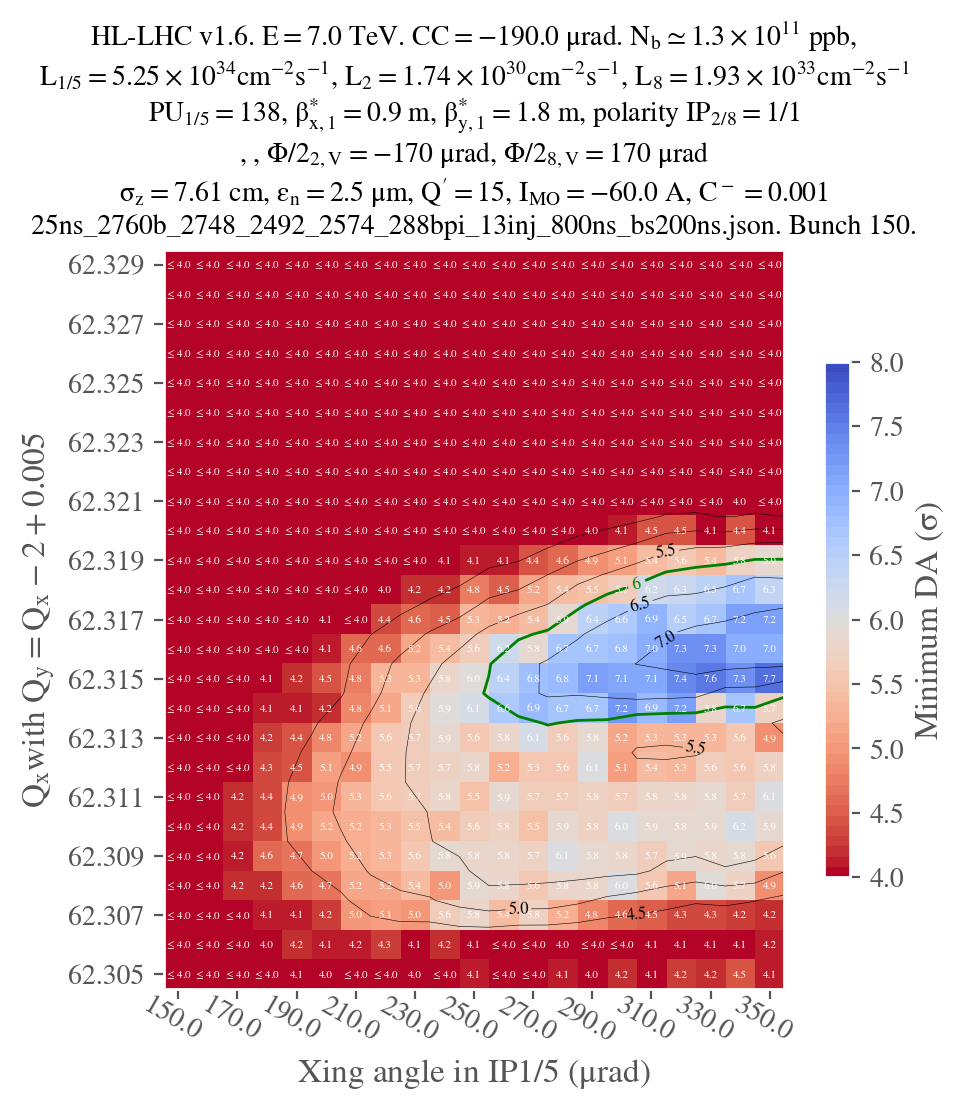

In [5]:
#l_oct = np.linspace(-300,300,25)
#df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
#df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = r"Xing angle in IP1/5 ($\mu$rad)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.9,
    bety=1.8,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    green_contour=6.,
    CC = True,
    vmin=4.,
    vmax=8.0,
    extended_diagonal=False,
    Nb=True,
    display_xing = False,
    #title="opt_collapse_1100_1500_oct_scan",
)
